In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accident_coords_update.ipynb
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Areas.shp
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson


In [2]:
df_2005_2007 = pd.read_csv("../input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv")
df_2009_2011 = pd.read_csv("../input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv")
df_2012_2014 = pd.read_csv("../input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = pd.concat([df_2005_2007,df_2009_2011,df_2012_2014])


In [4]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [5]:
temiz_data = df.drop(["Accident_Index","Location_Easting_OSGR","Location_Northing_OSGR","Police_Force",
         "Number_of_Vehicles","Number_of_Casualties","Local_Authority_(District)",
         "Local_Authority_(Highway)","1st_Road_Class","1st_Road_Number","Junction_Detail",
         "2nd_Road_Class","2nd_Road_Number","Pedestrian_Crossing-Human_Control",
         "Pedestrian_Crossing-Physical_Facilities","Did_Police_Officer_Attend_Scene_of_Accident",
         "LSOA_of_Accident_Location"],axis=1)

In [6]:
temiz_data.head()

,Longitude,Latitude,Accident_Severity,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Year
0,-0.191170,51.489096,2,04/01/2005,3,17:42,Single carriageway,30,NaN,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,2005
1,-0.211708,51.520075,3,05/01/2005,4,17:36,Dual carriageway,30,Automatic traffic signal,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2005
2,-0.206458,51.525301,3,06/01/2005,5,00:15,Single carriageway,30,NaN,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2005
3,-0.173862,51.482442,3,07/01/2005,6,10:35,Single carriageway,30,NaN,Daylight: Street light present,Fine without high winds,Dry,None,None,1,2005
4,-0.156618,51.495752,3,10/01/2005,2,21:13,Single carriageway,30,NaN,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,2005


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [8]:
df.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,1504049.0,439621.405078,95116.160326,64950.000000,375060.000000,439960.000000,523060.000000,6.553700e+05
Location_Northing_OSGR,1504049.0,300158.403995,161008.382735,10290.000000,178260.000000,268830.000000,398151.000000,1.208800e+06
Longitude,1504049.0,-1.436625,1.398078,-7.516225,-2.373902,-1.403714,-0.221510,1.759398e+00
Latitude,1504049.0,52.589399,1.449889,49.912941,51.490156,52.309126,53.478581,6.075754e+01
Police_Force,1504150.0,30.205364,25.516033,1.000000,6.000000,30.000000,45.000000,9.800000e+01
Accident_Severity,1504150.0,2.838190,0.401842,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,1504150.0,1.831606,0.714759,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Number_of_Casualties,1504150.0,1.350960,0.825335,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Day_of_Week,1504150.0,4.118607,1.924405,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),1504150.0,347.614855,259.429163,1.000000,110.000000,322.000000,518.000000,9.410000e+02


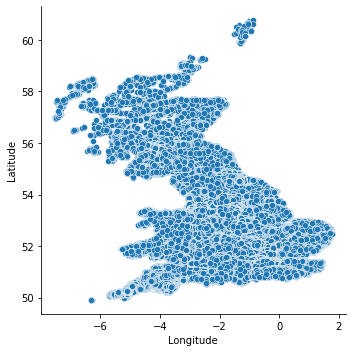

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(data=df,x="Longitude",y="Latitude")

## Kırsal ve kentsel alanlar nasıl farklılaştı?

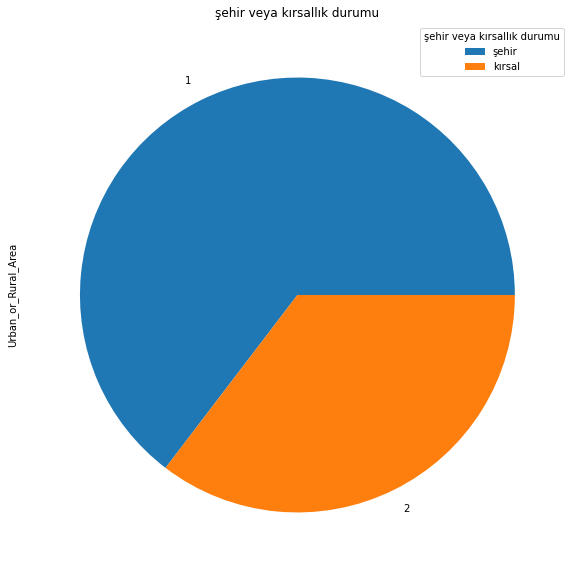

In [11]:
area = pd.DataFrame(df["Urban_or_Rural_Area"].value_counts())
area = area.drop([3])

area.plot.pie(y="Urban_or_Rural_Area",figsize=[10,10])
plt.title("şehir veya kırsallık durumu")
plt.legend(title="şehir veya kırsallık durumu",labels=["şehir","kırsal"])

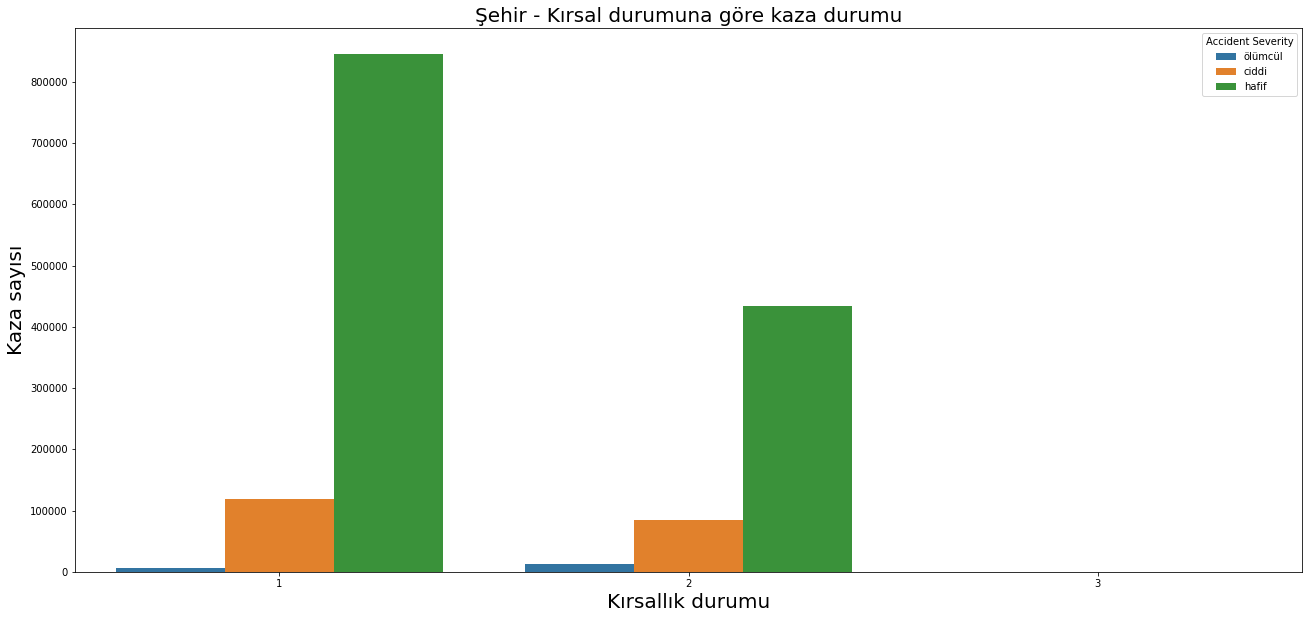

In [12]:
plt.figure(figsize=(22,10))
sns.countplot(data=df,x="Urban_or_Rural_Area",hue="Accident_Severity")
plt.title("Şehir - Kırsal durumuna göre kaza durumu",size=20)
plt.xlabel("Kırsallık durumu",size=20)
plt.ylabel("Kaza sayısı",size=20)
plt.legend(title="Accident Severity",labels=["ölümcül","ciddi","hafif"])

## Kaza oranlarını ne artırır?

Text(0, 0.5, 'Number Of Accidents')

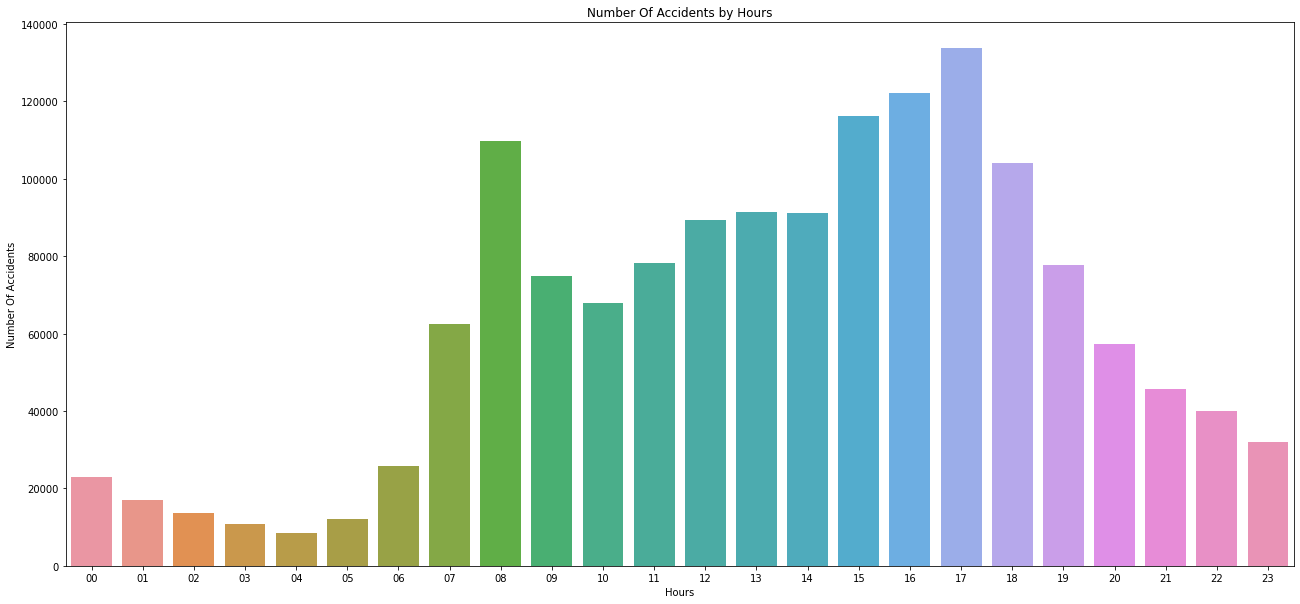

In [13]:
hours = pd.DataFrame(df["Time"].astype("datetime64"))
hours = pd.DataFrame(hours.Time.dt.strftime('%H').sort_values(),columns=["Time"])

plt.figure(figsize=(22,10))
sns.countplot(data=hours,x="Time")
plt.title("Number Of Accidents by Hours")
plt.xlabel("Hours")
plt.ylabel("Number Of Accidents")

Text(0, 0.5, 'Numbers Of Accidents')

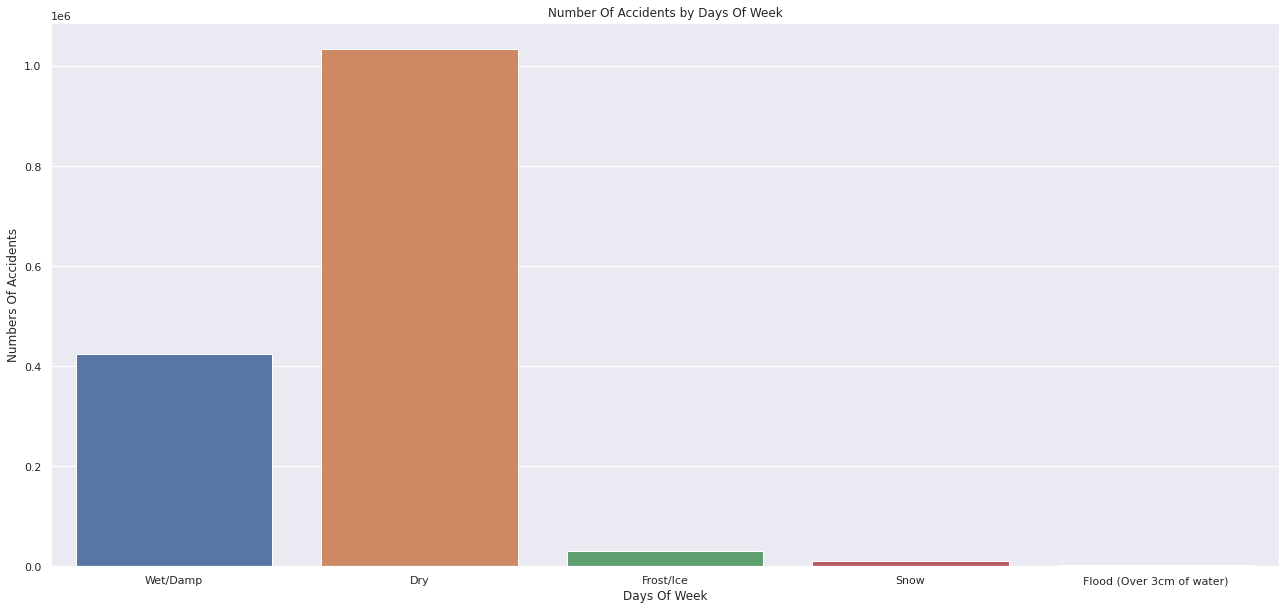

In [14]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(22,10))
sns.countplot(x="Road_Surface_Conditions",data=df)
plt.title("Number Of Accidents by Days Of Week")
plt.xlabel("Days Of Week")
plt.ylabel("Numbers Of Accidents")

Text(0, 0.5, 'Numbers Of Accidents')

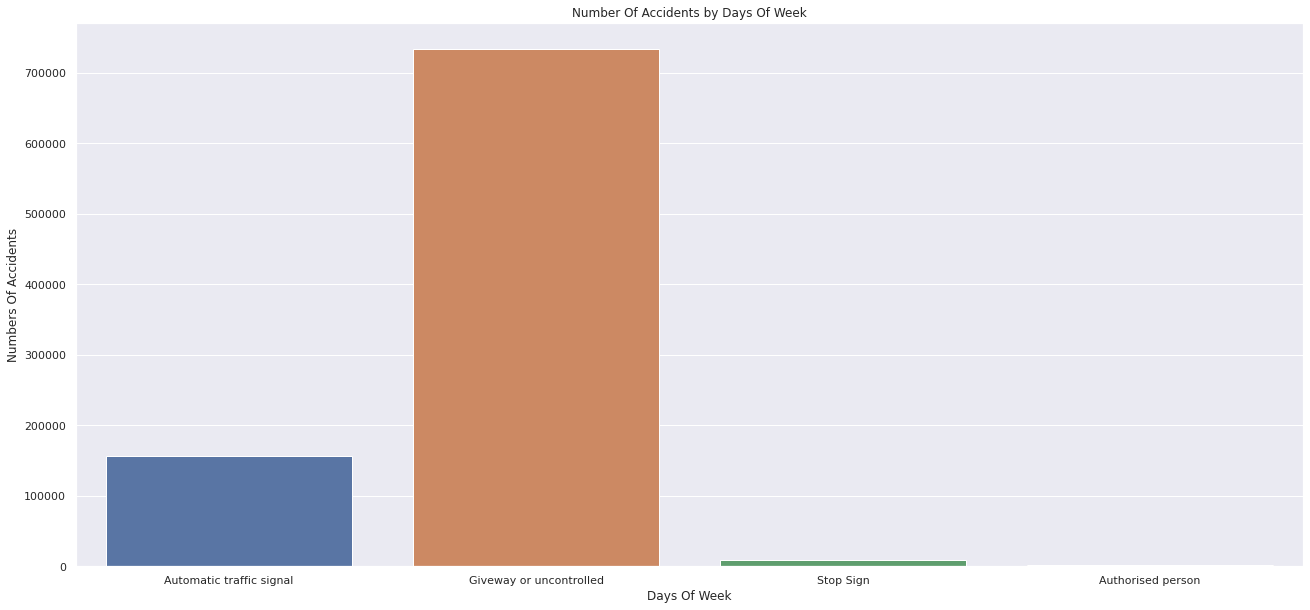

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(22,10))
sns.countplot(x="Junction_Control",data=df)
plt.title("Number Of Accidents by Days Of Week")
plt.xlabel("Days Of Week")
plt.ylabel("Numbers Of Accidents")

Text(0, 0.5, 'Numbers Of Accidents')

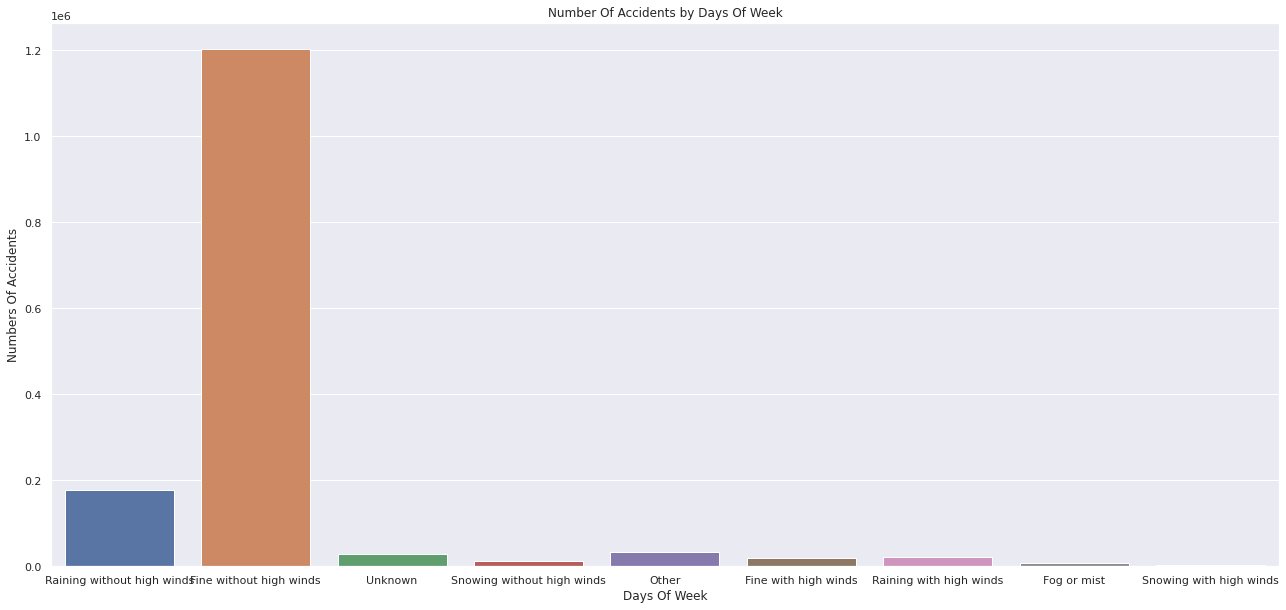

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(22,10))
sns.countplot(x="Weather_Conditions",data=df)
plt.title("Number Of Accidents by Days Of Week")
plt.xlabel("Days Of Week")
plt.ylabel("Numbers Of Accidents")